# Decision Trees 1 - Visualization and hyperparameters

In [3]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In this notebook, we use the DecisionTreeClassifier from sklearn to create and train a decision tree. 

We start by creating a toy dataset, which we will use to explore the main functionalities of decision trees:

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=2, random_state=3)

The data is split into a test and training set:

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

We then instantiate the DecisionTreeClassifier, and fit it to the training data:

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

We can use the *graphviz* package to visualize the decision tree:

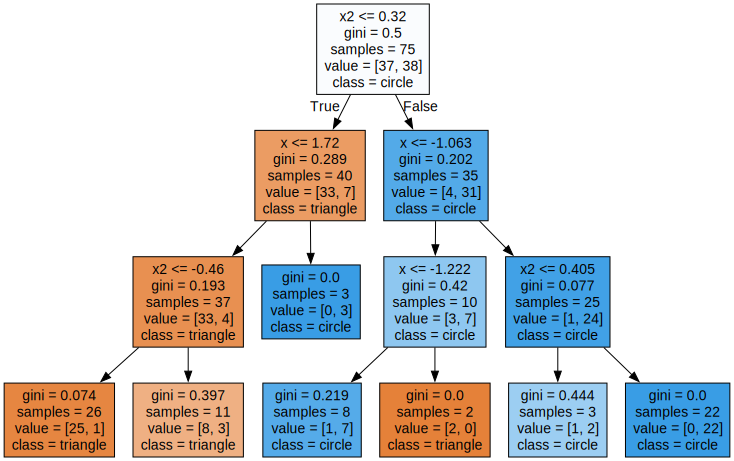

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, class_names=["triangle","circle"], feature_names=["x","x2"], filled=True)

# Create a graph from the dot_data string
graph = graphviz.Source(dot_data)

graph

... and the *pydotplus* module to control the size of the printed tree:

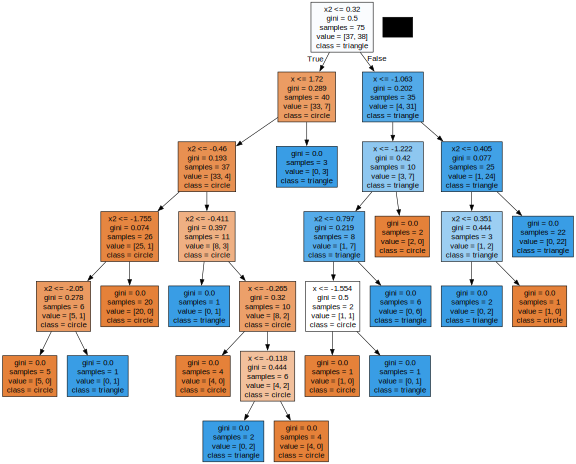

In [8]:
pydotplus_graph = pydotplus.graph_from_dot_data(dot_data)
pydotplus_graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(pydotplus_graph.to_string())

gvz_graph

When we only have two features, as in the moons-data, we can also visualize the classifier in another way - namely by plotting the decision boundary:

<Axes: >

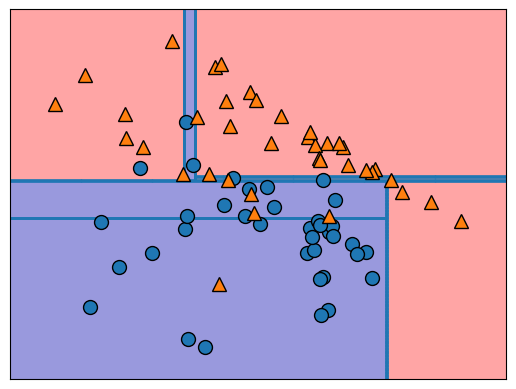

In [19]:
mglearn.plots.plot_tree_partition(X_train, y_train, clf)

In [9]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.760


This is a clear example of overfitting! In order to avoid this, we can control a number of hyperparameters, including:
- The maximum number of questions any given branch is allowed to ask: **max_depth** (default: *None*)
- The maximum number of leafs: **max_leaf_nodes**
- The minimum samples a node should contain to allow it to be split: **min_samples_split** (default: *2*)
- (the splitting criterion): **criterion** (default: *Gini*)

Tuning these parameters is called *pre-pruning*.

You can read about all the hyperparameters in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Pre-pruning

In [23]:
clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

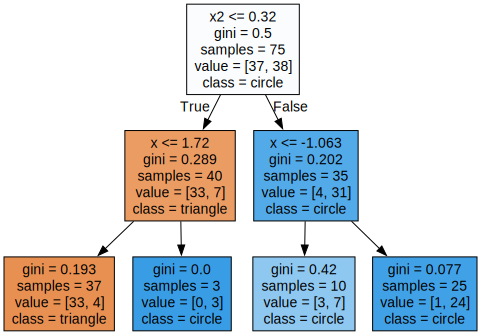

In [24]:
dot_data = export_graphviz(clf, out_file=None, class_names=["triangle","circle"], feature_names=["x","x2"], filled=True)

# Create a graph from the dot_data string
graph = graphviz.Source(dot_data)

graph

<Axes: >

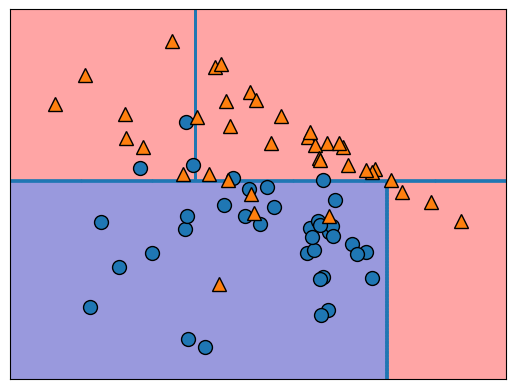

In [25]:
mglearn.plots.plot_tree_partition(X_train, y_train, clf)

In [22]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.920
Accuracy on test set: 0.880
